<a href="https://colab.research.google.com/github/sapna222/Demo-Test/blob/master/time%20sereis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install fbprophet
!pip install pystan

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached ephem-4.1.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
ERROR: Could not build wheels for fbprophet, which is required to install pyproject.toml-based projects


In [7]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
df = pd.read_csv('/content/monthly-milk-production-pounds.csv')

In [11]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [12]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [14]:
df.drop(168,axis=0,inplace=True)

In [15]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [17]:
df.columns =['ds','y']

<Axes: >

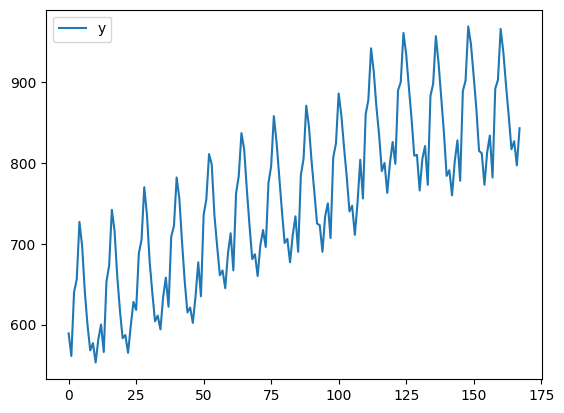

In [18]:
df.plot()

In [19]:
df.head()

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [20]:
df['ds'] =pd.to_datetime(df['ds'])

In [21]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


<Axes: >

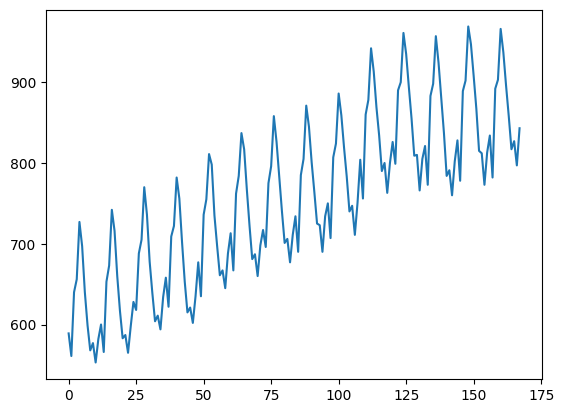

In [22]:
df['y'].plot()

In [23]:
df['y'] = df['y']-df['y'].shift(1)

In [24]:
df.head()

,ds,y
0,1962-01-01,NaN
1,1962-02-01,-28.0
2,1962-03-01,79.0
3,1962-04-01,16.0
4,1962-05-01,71.0


<Axes: >

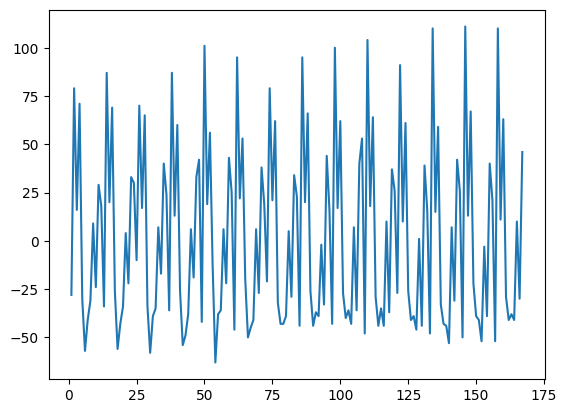

In [25]:
df['y'].plot()

In [27]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'calculate_initial_params',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot

In [28]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpast7kk80/yqquln1o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpast7kk80/5cwogzcp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9545', 'data', 'file=/tmp/tmpast7kk80/yqquln1o.json', 'init=/tmp/tmpast7kk80/5cwogzcp.json', 'output', 'file=/tmp/tmpast7kk80/prophet_model5em_9l12/prophet_model-20240206081313.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:13:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:13:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [29]:
model

In [30]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [31]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [33]:
future_dates=model.make_future_dataframe(periods=365)

In [34]:
future_dates

,ds
0,1962-02-01
1,1962-03-01
2,1962-04-01
3,1962-05-01
4,1962-06-01
...,...
527,1976-11-26
528,1976-11-27
529,1976-11-28
530,1976-11-29


In [35]:
predication = model.predict(future_dates)

In [36]:
predication.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-02-01,1.959705,-48.165346,-29.537711,1.959705,1.959705,-40.258653,-40.258653,-40.258653,-40.258653,-40.258653,-40.258653,0.0,0.0,0.0,-38.298948
1,1962-03-01,1.957746,85.677969,104.657008,1.957746,1.957746,93.022026,93.022026,93.022026,93.022026,93.022026,93.022026,0.0,0.0,0.0,94.979772
2,1962-04-01,1.955577,7.241995,25.730598,1.955577,1.955577,14.325184,14.325184,14.325184,14.325184,14.325184,14.325184,0.0,0.0,0.0,16.280761
3,1962-05-01,1.953478,53.265007,71.619733,1.953478,1.953478,60.544491,60.544491,60.544491,60.544491,60.544491,60.544491,0.0,0.0,0.0,62.497969
4,1962-06-01,1.951309,-35.497902,-17.514449,1.951309,1.951309,-28.217094,-28.217094,-28.217094,-28.217094,-28.217094,-28.217094,0.0,0.0,0.0,-26.265784


In [39]:
predication[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
527,1976-11-26,12.923482,3.218986,21.775381
528,1976-11-27,18.378281,9.358932,27.802326
529,1976-11-28,23.967438,14.682926,33.082920
530,1976-11-29,29.578245,20.655386,39.110667
531,1976-11-30,35.092081,26.744229,44.851842


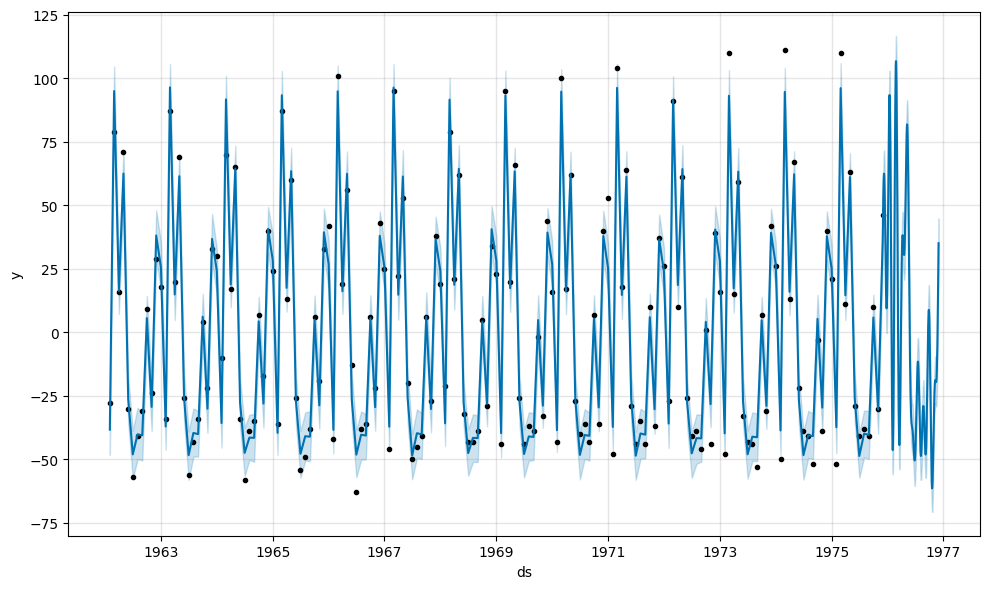

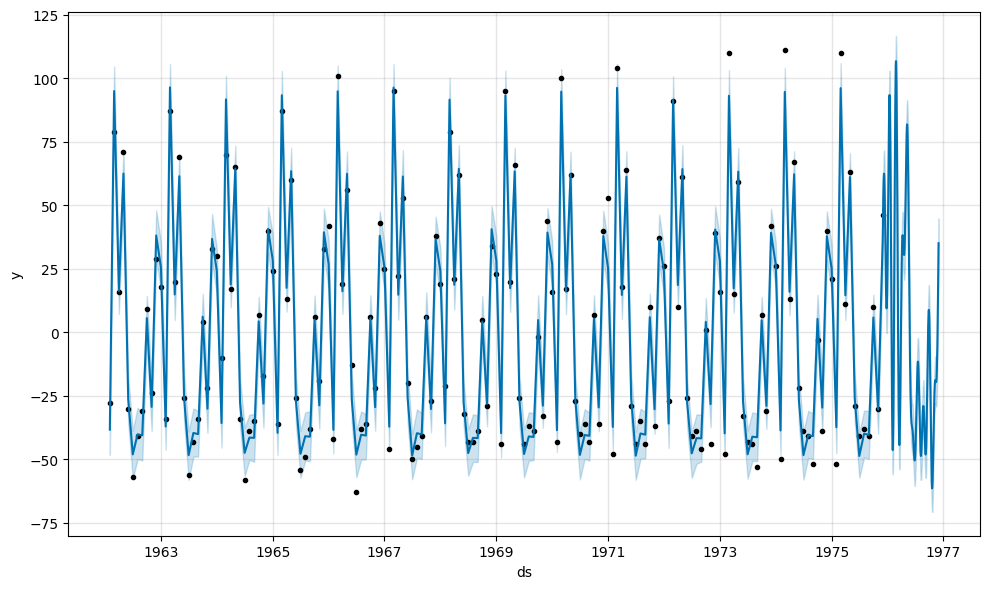

In [40]:
model.plot(predication)

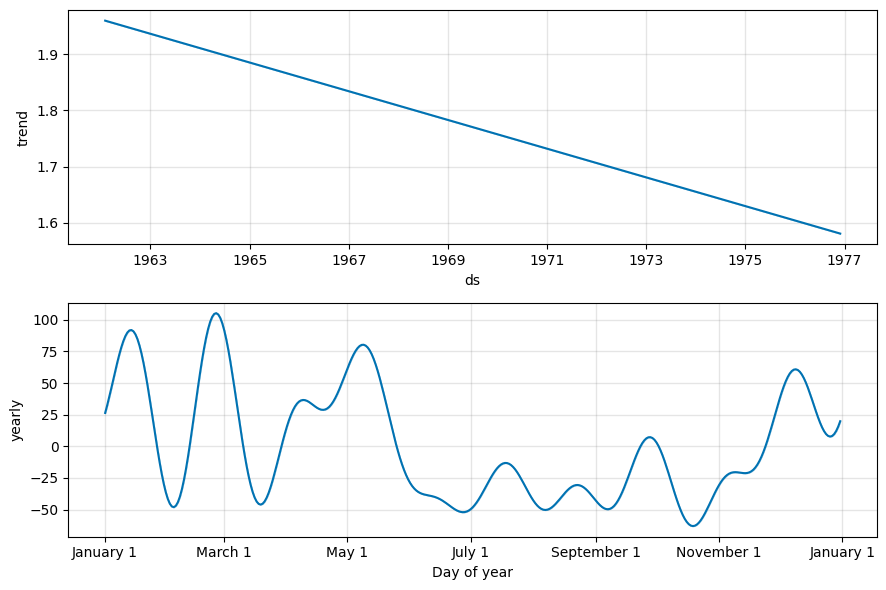

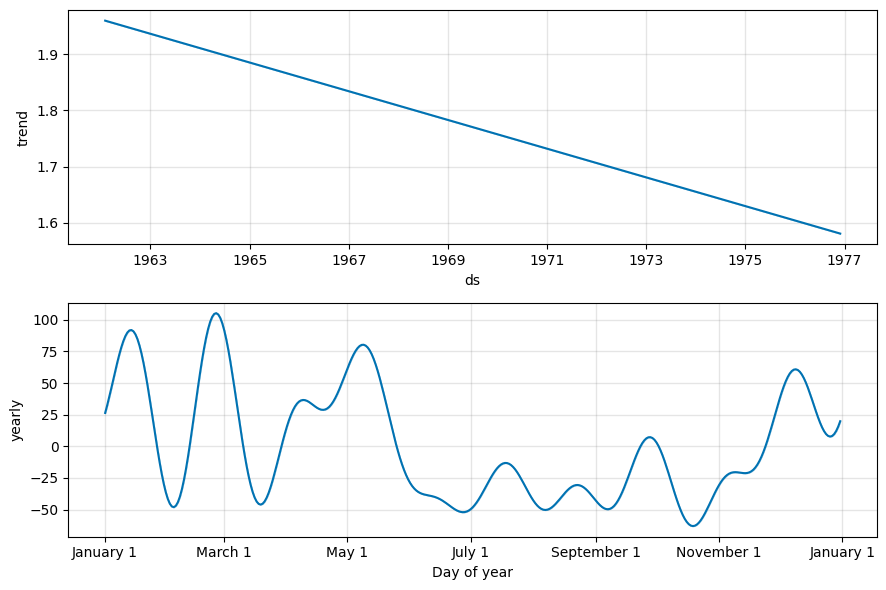

In [42]:
model.plot_components(predication)

In [49]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model,horizon='365 days', period ='180 days', initial = '1095 days')

INFO:prophet:Making 20 forecasts with cutoffs between 1965-07-21 00:00:00 and 1974-12-01 00:00:00


  0%|          | 0/20 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpast7kk80/nbaste1w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpast7kk80/h3epjvvv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78223', 'data', 'file=/tmp/tmpast7kk80/nbaste1w.json', 'init=/tmp/tmpast7kk80/h3epjvvv.json', 'output', 'file=/tmp/tmpast7kk80/prophet_modeltckvbq00/prophet_model-20240206085117.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:51:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:51:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpast7kk80/o8sndb_o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpast7kk80/mpv33mdm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

In [50]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-08-01,-40.898333,-46.441149,-35.525929,-49.0,1965-07-21
1,1965-09-01,-34.869403,-39.923768,-29.206478,-38.0,1965-07-21
2,1965-10-01,6.103185,0.907431,11.569768,6.0,1965-07-21
3,1965-11-01,-20.281447,-25.947823,-14.794711,-19.0,1965-07-21
4,1965-12-01,36.035424,30.781845,41.592432,33.0,1965-07-21


In [ ]:
1964,1966
1964,1965...Train
1965,1966....Test
1966,1968----validation

In [52]:
from prophet.diagnostics import performance_metrics
df_performance=performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,41 days,122.121545,11.050862,9.078526,0.261302,0.196944,0.252037,0.500000
1,42 days,114.028236,10.678400,8.533921,0.231650,0.171733,0.230956,0.583333
2,43 days,122.890453,11.085597,8.800008,0.225817,0.171733,0.228034,0.583333
3,46 days,88.964485,9.432099,7.857015,0.213076,0.171733,0.205358,0.625000
4,47 days,86.939783,9.324151,7.671351,0.209922,0.171733,0.202324,0.645833


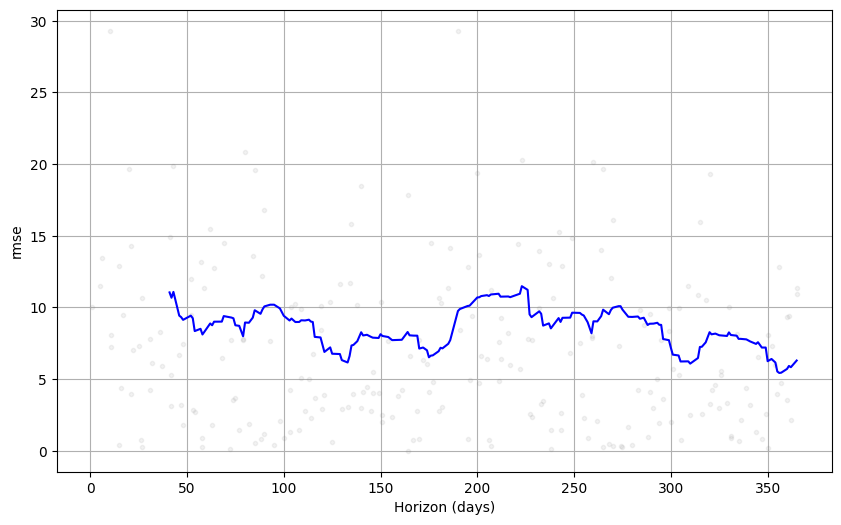

In [53]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv,metric='rmse')